In [198]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글 설정
matplotlib.rcParams['font.size'] = 10 #글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [199]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
                33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [200]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
results = [1]*35+[0]*14 

In [201]:
data = [length, weight, results]
df = pd.DataFrame(data)
df = df.T
df

,0,1,2
0,25.4,242.0,1.0
1,26.3,290.0,1.0
2,26.5,340.0,1.0
3,29.0,363.0,1.0
4,29.0,430.0,1.0
5,29.7,450.0,1.0
6,29.7,500.0,1.0
7,30.0,390.0,1.0
8,30.0,450.0,1.0
9,30.7,500.0,1.0


In [202]:
datas = df.iloc[:,:2]
datas

results = df.iloc[:,2]
results

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
Name: 2, dtype: float64

In [203]:
from sklearn.model_selection import train_test_split
# random_state=42 --> 훈련 세트, 테스트 세트가 할 때마다 섞이지 않도록 고정.
# stratify --> 설정 데이터를 가지고 랜덤으로 데이터 섞어줌.
train_input, test_input, train_target, test_target = train_test_split(
    datas, results,stratify=results
)
train_input

,0,1
6,29.7,500.0
44,12.2,12.2
17,33.0,700.0
40,11.3,8.7
32,39.5,925.0
4,29.0,430.0
27,36.0,714.0
28,36.0,850.0
10,31.0,475.0
26,35.0,720.0


In [204]:
# 1. 데이터 전처리 - Nan, 0, type, 표준화 작업, 훈련세트, 테스트세트
# 2. 데이터 학습시키기 - 판단, 분류 (classification), 예측 (regression)
# Classification - KNN 알고리즘 
clf = KNeighborsClassifier()
clf.fit(train_input,train_target)
# 3. 데이터 예측하기
predict = clf.predict(test_input)
predict

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [205]:
# 4. 정확도 측정
score = clf.score(test_input,test_target)
print(score)

1.0


In [206]:
# 25, 125의 고기 측정
predict = clf.predict([[30,600]])
predict

array([0.])

In [207]:
# 25,150의 데이터는 knn 판변할 때 이웃하는 데이터 = idexes
distanse, indexes = clf.kneighbors([[25,150]])
indexes

array([[21, 33, 19, 30,  1]], dtype=int64)

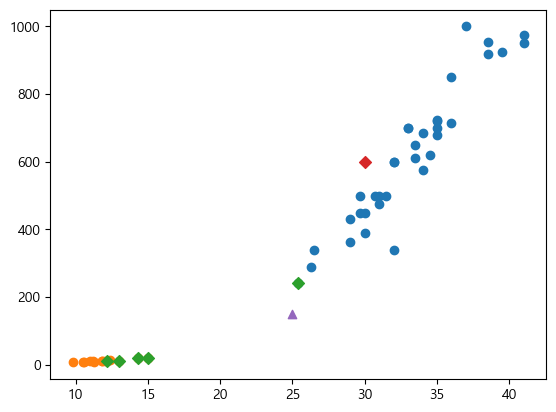

In [208]:
# 25, 125의 고기를 측정하시오.
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(train_input.iloc[indexes[0],0],train_input.iloc[indexes[0],1], marker='D')
plt.scatter(30,600,marker='D')
plt.scatter(25,150,marker='^')
# plt.xticks([0,1000])

In [209]:
# 실험 데이터로 확인
predict = clf.predict([[25,150]])
print("판별 : ",predict)

[1.]


In [210]:
# pandas - 평균(mean), 표준편차(std)
train_input.mean()
train_input.std()

0     10.124045
1    327.884969
dtype: float64

In [211]:
# 표준 점수 = (훈련 데이터 - 평균) / 표준편차
# numpy - 평균, 표준편차
type(train_input)

mean = np.mean(train_input, axis=0)
std = np.std(train_input,axis=0)
std

0      9.982443
1    323.298939
dtype: float64

In [212]:
# train_input,test_input

train_scaled = (train_input - mean) / std
# train_scaled = (test_input - mean) / std
# 표준 점수 = (테스트점수 - 평균) / 표준 편차

In [ ]:
# 25, 125의 고기를 측정하시오.
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(train_input.iloc[indexes[0],0],train_input.iloc[indexes[0],1], marker='D')
# plt.scatter(30,600,marker='D')
plt.scatter(25,150,marker='^')
# plt.xticks([0,1000])

In [213]:
new = ([25,150]-mean)/std
new

0   -0.230126
1   -0.940607
dtype: float64

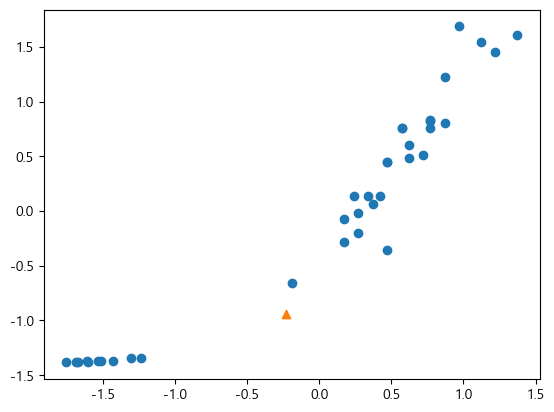

In [214]:
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])
plt.scatter(new[0],new[1],marker='^')

In [215]:
clf.fit(train_scaled,train_target)

KNeighborsClassifier()

In [216]:
test_saled = (test_input - mean)/ std

In [217]:
score = clf.score(test_saled,test_target )
score

1.0

In [218]:
predict = clf.predict([new])
predict

array([1.])

In [219]:
# KNN 예측에 이용한 데이터
distanses, indexes = clf.kneighbors([new])

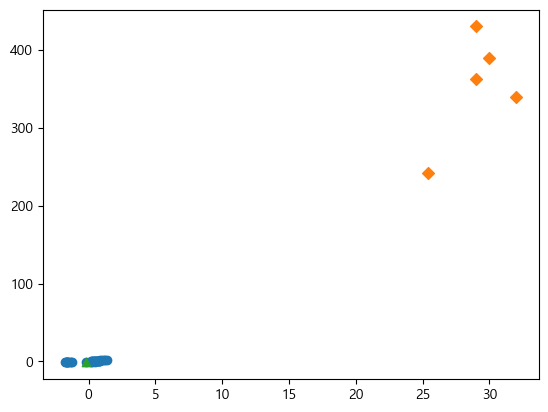

In [220]:
# 25, 125의 고기를 측정하시오.
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])
plt.scatter(train_scaled.iloc[indexes[0],0],train_scaled.iloc[indexes[0],1], marker='D')
plt.scatter(new[0],new[1],marker='^')